# 1 thousand photons

teo-input-spect.png
rays generated
gen-input-spect.png
pasing rays
Number of rays on Detector 58
Time total: 390 seconds
Time per ray (s): 0.14871794871794872


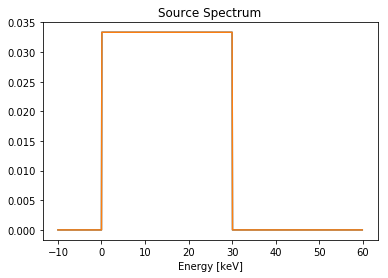

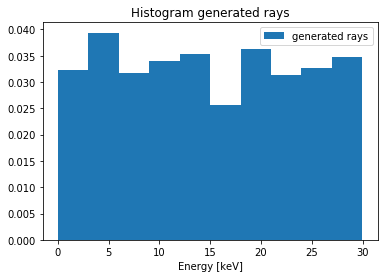

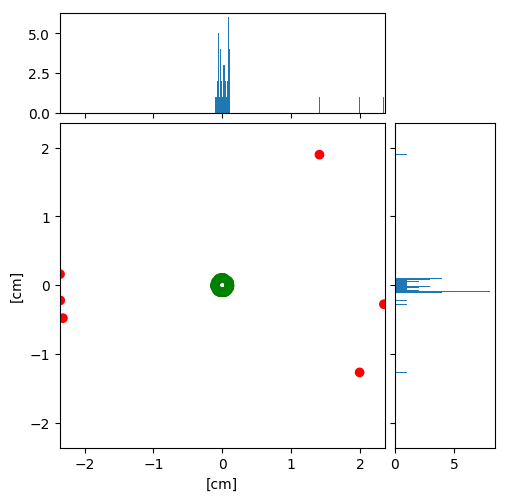

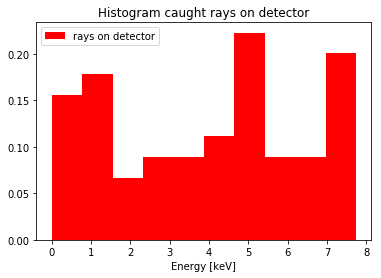

In [3]:
from foxsisim.module import Module
from foxsisim.detector import Detector
from foxsisim.source import Source
from foxsisim.plotting import plot,scatterHist
import matplotlib.pyplot as plt
import numpy as np

max_energy = 30.0
nrays = 1000

def spectrum(z):
        if (type(z) is not type([1])) and (type(z) is not type(np.array(1))):
            x = np.array([z])
        else:
            x = np.array(z)
        return np.piecewise(x, [x < 0, ((x < max_energy) & (x > 0)), (x >= max_energy)], [0, 1./max_energy, 0])

source_distance = -1e4 ##cm
source = Source(type='point', center=[0, 0, source_distance])
source.loadSpectrum(spectrum)
energies = np.arange(-10, 60, 0.1)
plt.plot(energies, source._spectrum(energies))
plt.xlabel('Energy [keV]')
plt.title('Source Spectrum')
#plt.show()
print('teo-input-spect.png')
plt.savefig('teo-input-spect.png')

module = Module(radii=[5.151,4.9],focal=200.0)
detector = Detector(width=8,
                    height=8,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])

rays = source.generateRays(module.targetFront, nrays) # this should run for about 7 hours

print('rays generated')

plt.figure()
plt.hist([ray.energy for ray in rays], normed=True, label='generated rays')
plt.xlabel('Energy [keV]')
plt.title('Histogram generated rays')
plt.legend()
#plt.show()
print('gen-input-spect.png')
plt.savefig('gen-input-spect.png')


from datetime import datetime
tstart = datetime.now()

print('pasing rays')
# pass rays through module
module.passRays(rays, robust=True)
# catch rays at detector
detector.catchRays(rays)


rays_on_detector = len(detector.rays)
print('Number of rays on Detector ' + str(rays_on_detector))
print('Time total: ' + str((datetime.now() - tstart).seconds) + ' seconds')
print('Time per ray (s): ' + str(rays_on_detector / float((datetime.now() - tstart).seconds)))

drays = [ray for ray in rays if ray.des[2]==230.0]
scatterHist(drays)
#plt.show()
plt.savefig('photons_on_detec.png')

plt.figure()
plt.hist([ray.energy for ray in detector.rays], normed=True, label='rays on detector',color='r')
plt.xlabel('Energy [keV]')
plt.title('Histogram caught rays on detector')
plt.legend()
plt.show()
plt.savefig('output_spect_on_detec.png')


In [ ]:
from foxsisim.util import save_rays, load_rays 
save_rays(detector.rays,filename='/Users/Kamilobu/Desktop/rays/run03.csv')

In [9]:
max([ray.energy for ray in detector.rays])

7.7365470178067302

In [14]:
np.sort([ray.energy for ray in detector.rays])

array([  2.38621612e-03,   7.67661175e-02,   8.75226167e-02,
         1.40661012e-01,   3.06662126e-01,   3.68303474e-01,
         7.49585889e-01,   7.82195666e-01,   7.94490306e-01,
         8.02489665e-01,   9.31637000e-01,   1.01632258e+00,
         1.29850966e+00,   1.50162876e+00,   1.52334875e+00,
         2.11998331e+00,   2.14072218e+00,   2.20223395e+00,
         2.53571781e+00,   2.90181926e+00,   2.97748350e+00,
         3.01149389e+00,   3.10082061e+00,   3.68427377e+00,
         3.82952437e+00,   3.86802488e+00,   3.90445566e+00,
         4.07777620e+00,   4.17199750e+00,   4.33717321e+00,
         4.48291417e+00,   4.71208395e+00,   4.83559135e+00,
         4.84080710e+00,   4.89903266e+00,   4.90956500e+00,
         4.92036171e+00,   5.09063006e+00,   5.31285519e+00,
         5.35366362e+00,   5.35949153e+00,   5.47352889e+00,
         5.54833120e+00,   5.73314492e+00,   5.76548725e+00,
         6.25461018e+00,   6.77278501e+00,   6.80229851e+00,
         6.87234067e+00,